# P1 Disposable Cups (Clear)  - Product Research

In [253]:
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

df = pd.read_csv('/Users/sammarcustaylor/Desktop/cups.csv', skipinitialspace = True)
df['Product Name'] = df['Product Name'].str.lower()
df = df.fillna(0)

# to drop faulty row
df = df.drop([52]).reset_index()


# clean up dataframe where there are columns with dollar signs and commas present. Changes column values to numeric

lst = ['Mo. Revenue', 'Price', 'Net', 'Rating', 'Fees', 'D. Sales']


for column in lst:
    df[column] = df[column].replace({'\$' : '', ',' : ''}, regex = True)

    
for column in lst:
    df[column] = pd.to_numeric(df[column])
    

sentences = df['Product Name'].values
phrase = 'oz'

phrase_2 = 'ounce'

types = []


# finds the number of ounces within the prouct name description

def find_phrase(phrase, phrase_2, sentences):
    
    no_of_sentences = len(sentences)
    i = 0
    while i < no_of_sentences:
        for sentence in sentences:
            x = sentence.find(phrase)
            x2 = sentence.find(phrase_2)
            
            if x > 0:
                x1 = x +2
                y = x-3
                if y < 0:
                    y = 0
                output = sentence[y:x1]
                types.append(output)
            else:
                x1 = x2 +5
                y = abs(x2 - 2)
                output = sentence[y:x1]
                types.append(output)
            i += 1
            
    
find_phrase(phrase, phrase_2, sentences) 

df.insert(loc = 3, column = 'ounces', value = types)
df['ounces'] = df['ounces'].str.extract('(\d+)', expand = False)
df['ounces'] = df['ounces'] + [' ounces']

material = df['Product Name'].str.contains('plastic')
df.insert(loc = 3, column = 'Material', value = material)
df['Material'] = df['Material'].apply(lambda x: 'Plastic' if x == True else 'Other')

df.drop(columns = ['index'], inplace = True)


# filters for a dataframe that meets the daily sales threshold above 10

above_10 = df.loc[df['D. Sales'] > 10].sort_values(by = 'D. Sales', ascending = False)
above_10.reset_index(drop = True)

above_10

,#,Product Name,Material,ounces,Brand,Price,Mo. Sales,D. Sales,Mo. Revenue,Date First Available,Net,Reviews,Rating,Fees,Rank,ASIN,Link
2,3,[100 pack - 16 oz.] crystal clear pet plastic ...,Plastic,16 ounces,Comfy Package,12.99,5380,247,69886,5/15/16,2.37,3908,4.8,10.62,2520.0,B01FRDSU1A,https://www.amazon.com/100-Pack-Crystal-Clear-...
6,7,[100 sets - 16 oz.] clear plastic cups with st...,Plastic,16 ounces,Stack Man,18.99,6341,240,120416,2/4/20,6.82,6107,4.8,12.17,2611.0,B084JFRDZK,https://www.amazon.com/Stack-Man-100-Sets-Disp...
35,36,[100 sets - 16 oz.] clear plastic cups with st...,Plastic,16 ounces,Stack Man,18.99,6341,240,120416,2/4/20,6.82,6107,4.8,12.17,2611.0,B084JFRDZK,https://www.amazon.com/Stack-Man-100-Sets-Disp...
25,26,amazon basics 16-ounce disposable plastic cups...,Plastic,6 ounces,Amazon Basics,20.99,8472,233,177827,11/12/17,4.77,3539,4.8,16.22,2706.0,B072QCNR2Q,https://www.amazon.com/AmazonBasics-16oz-Dispo...
36,37,[100 sets - 16 oz.] plastic cups with flat lids,Plastic,16 ounces,Comfy Package,17.99,6447,214,115982,3/15/16,6.34,6288,4.8,11.65,1957.0,B01D1XVQ64,https://www.amazon.com/Comfy-Package-100-Sets-...
27,28,dealmed disposable clear plastic cups 3 oz. 10...,Plastic,3 ounces,Dealmed,6.49,5301,188,34403,3/12/19,-2.16,1904,4.8,8.65,3473.0,B07PPPSLNN,https://www.amazon.com/Dealmed-Disposable-Clea...
9,10,dealmed disposable clear plastic cups 3 oz. 10...,Plastic,3 ounces,Dealmed,6.49,5301,188,34403,3/12/19,-2.16,1904,4.8,8.65,3473.0,B07PPPSLNN,https://www.amazon.com/Dealmed-Disposable-Clea...
31,32,[500 pack - 9 oz.] clear disposable plastic cu...,Plastic,9 ounces,Comfy Package,21.99,1964,188,43188,4/21/20,10.51,1937,4.8,11.48,3492.0,B087HK9XWJ,https://www.amazon.com/500-Pack-Disposable-Pla...
0,1,stack man - 16oz plastic cups [100-pack] [100 ...,Plastic,16 ounces,Stack Man,11.99,4398,186,52732,2/4/20,1.61,1880,4.8,10.38,3522.0,B084JPR5VX,https://www.amazon.com/Stack-Man-100-Pack-Disp...
4,5,stack man - 16oz plastic cups [100-pack] [100 ...,Plastic,16 ounces,Stack Man,11.99,4398,186,52732,2/4/20,1.61,1880,4.8,10.38,3522.0,B084JPR5VX,https://www.amazon.com/Stack-Man-100-Pack-Disp...


### This code provides a data frame with new columns that automatically pull out the type of material and ounces from the product name description. In addition, it filters out to only provide products that meet the daily sales threshold above 10 per day. 

In [254]:
check = above_10.groupby('ounces')
check = check['Mo. Revenue'].agg(['mean', 'count']).astype(int).reset_index()
check.rename(columns={'ounces': 'product_types', 'mean' : 'avg_revenue'}, inplace = True)



unique_vals = df['ounces'].unique()
ratio = []
averages = []

def daily_threshold(category):
    for variations in category:
        above_daily_sales = len(above_10.loc[above_10['ounces'] == variations])
        total_sales = len(df.loc[df['ounces'] == variations]) 
        avg = df.loc[df['ounces'] == variations]['Net'].mean()
        averages.append(avg)
        answer = (above_daily_sales / total_sales)
        ratio.append(answer)
        
daily_threshold(unique_vals)

u = list(unique_vals)

info = pd.DataFrame({'product_types' : u, 'ratio_above_daily_sales' : ratio, 'average_net' : averages})
info = pd.merge(info, check, on = 'product_types')

info = info.sort_values(by = 'avg_revenue', ascending = False)
info.reset_index(drop = True)

# what matters
# higher on search results aka top 5. 
# greater than 10 units

,product_types,ratio_above_daily_sales,average_net,avg_revenue,count
0,6 ounces,1.000000,4.770000,177827,1
1,32 ounces,1.000000,6.970000,67244,1
2,16 ounces,0.916667,8.135000,59678,11
3,24 ounces,1.000000,7.827500,54664,4
4,20 ounces,1.000000,9.160000,53014,2
5,12 ounces,0.500000,3.730000,35874,2
6,3 ounces,1.000000,-1.476667,24970,3
7,14 ounces,0.500000,8.970000,20239,1
8,9 ounces,0.937500,4.200625,19520,15
9,7 ounces,0.666667,0.250000,16976,2



### Given the filtered frame, I then grouped the data by the product type, created a ratio which tells what percentage of the product category meets daily sales.

### Next I created average net, and average revenue scores, along with the count of how many times that product types occured witin the data set. 

### The frame is sorted by descending order based on average revenue. Also the count is the number of competitors in that specific market that meet the daily sales. 

# P2 Disposable Cup w/ Flat Lid

In [255]:
df = pd.read_csv('/Users/sammarcustaylor/Desktop/P2.csv', skipinitialspace = True)
df['Product Name'] = df['Product Name'].str.lower()
df = df.fillna(0)

# to drop faulty row
# df = df.drop([52]).reset_index()


# clean up dataframe where there are columns with dollar signs and commas present. Changes column values to numeric

lst = ['Revenue', 'Reviews', 'Price', 'Rating', 'D. Sales', 'Mo. Sales', ]


for column in lst:
    df[column] = df[column].replace({'\$' : '', ',' : ''}, regex = True)

    
for column in lst:
    df[column] = pd.to_numeric(df[column])
    

sentences = df['Product Name'].values
phrase = 'oz'

phrase_2 = 'ounce'

types = []


# finds the number of ounces within the prouct name description

def find_phrase(phrase, phrase_2, sentences):
    
    no_of_sentences = len(sentences)
    i = 0
    while i < no_of_sentences:
        for sentence in sentences:
            x = sentence.find(phrase)
            x2 = sentence.find(phrase_2)
            
            if x > 0:
                x1 = x +2
                y = x-3
                if y < 0:
                    y = 0
                output = sentence[y:x1]
                types.append(output)
            else:
                x1 = x2 +5
                y = abs(x2 - 3)
                output = sentence[y:x1]
                types.append(output)
            i += 1
            
    
find_phrase(phrase, phrase_2, sentences) 

count_of_cups = [100, 100, 50 ,100, 85, 20, 50, 100, 50, 50 , 100, 200, 50, 100, 100]

df.insert(loc = 3, column = 'ounces', value = types)
df['ounces'] = df['ounces'].str.extract('(\d+)', expand = False)
df['ounces'] = df['ounces'] + [' ounces']

material = df['Product Name'].str.contains('plastic')
df.drop(columns = ['Material', 'Ounce / Size ', 'Count (# of Cups in product) ' ], inplace = True)
df.insert(loc = 3, column = 'Material', value = material)
df.insert(loc = 4, column = 'Count_of_Cups', value = count_of_cups)

df['Material'] = df['Material'].apply(lambda x: 'Plastic' if x == True else 'Other')


# filters for a dataframe that meets the daily sales threshold above 10

above_10 = df.loc[df['D. Sales'] > 10].sort_values(by = 'D. Sales', ascending = False)
above_10.reset_index(drop = True)

focus = above_10.loc[(above_10['ounces'] == '16 ounces') & (above_10['Material'] == 'Plastic')].sort_values(by = 'Revenue', ascending = False)

# filters for a dataframe that meets the daily sales threshold above 10

#### Provides a dataframe that is in the 16 ounce product category, and the material is equal to plastic. 

In [259]:
focus

,Index,Product Name,ounces,Material,Count_of_Cups,Brand,Price,Mo. Sales,D. Sales,Revenue,Reviews,Rating,Link
0,1,stack man [100 sets - 16 oz.] clear plastic cu...,16 ounces,Plastic,100,Stack Man,14.99,8990,254,134760,3691,4.8,https://www.amazon.com/Stack-Man-100-Sets-Disp...
1,2,[100 sets - 16 oz.] plastic cups with flat lid...,16 ounces,Plastic,100,Comfy Package,15.99,4727,129,75585,4863,4.8,https://www.amazon.com/Comfy-Package-100-Sets-...
10,11,stack man - 16oz plastic cups [100-pack] [100 ...,16 ounces,Plastic,100,Stack Man,11.99,4888,180,58607,965,4.8,https://www.amazon.com/Stack-Man-100-Pack-Disp...
11,12,200 clear plastic cups | 16 oz plastic cups | ...,16 ounces,Plastic,200,Prestee,19.99,2553,71,51034,719,4.7,https://www.amazon.com/Clear-Plastic-Disposabl...
8,9,[50 sets - 16 oz.] crystal clear plastic cups ...,16 ounces,Plastic,50,Comfy Package,12.99,2120,70,27539,1429,4.8,https://www.amazon.com/dp/B01DS7OZP2
2,3,stack man pet16-626sl-50 16 oz. clear cups wit...,16 ounces,Plastic,50,Stack Man,11.99,2169,61,26006,1002,4.7,https://www.amazon.com/Strawless-Sip-Lids-Crys...
3,4,tashibox disposable 16 oz plastic cups with fl...,16 ounces,Plastic,100,TashiBox,14.99,1612,53,24164,2439,4.7,https://www.amazon.com/dp/B01HHQ40IC


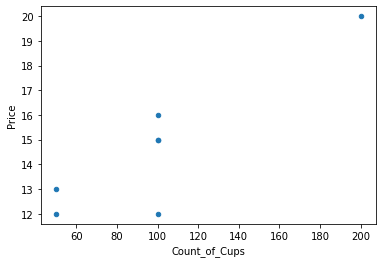

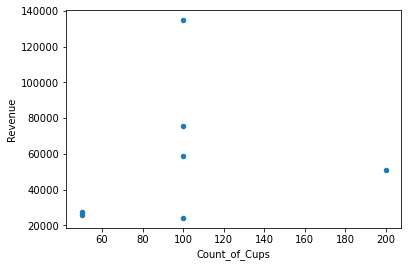

In [258]:
focus.plot.scatter(x = 'Count_of_Cups', y = 'Price')
focus.plot.scatter(x = 'Count_of_Cups', y = 'Revenue')